<a href="https://colab.research.google.com/github/gsfreitas/engenharia-medica/blob/main/atividade_pratica_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e funções

In [29]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import itertools
import scipy.io
import scipy.fft as fft
from scipy.signal import welch
from sklearn import svm
from scipy.stats import shapiro
import seaborn as sns
import operator

In [30]:
def t8_SVM(X,classesX,C=0.1,kernel='linear',tol=0.001,gamma='scale'):
    #Treina uma SVM em um conjunto de dados X
    # INTPUS:
    # - X = matriz padrões x características
    # - classesX = vetor com as classes dos padrões (0 ou 1)
    # - C, kernel e tol são os parâmetros da SVM
    # OUTPUTS:
    # - clf = objeto da SVM
    # - txerro = erro de treinamento

    # Cria um objeto SVM com os parâmetros especificados
    clf=svm.SVC(C=C,kernel=kernel,tol=tol,gamma=gamma)

    # Treina a SVM com os dados de entrada (X) e suas respectivas classes (classesX)
    clf.fit(X,classesX)

    # Imprime o número de vetores de suporte para cada classe
    for i in range(len(clf.n_support_)):
        print('Numero de vetores de suporte classe '+str(i)+': '+str(clf.n_support_[i]))

    # Faz previsões no conjunto de treinamento
    y=clf.predict(X)

    # Calcula a taxa de erro de treinamento
    txerro=sum(y!= classesX)/classesX.size

    # Imprime a taxa de erro de treinamento
    print('Taxa de erro treinamento: '+str(100*txerro)+'%')

    # Retorna o objeto SVM treinado (clf) e a taxa de erro de treinamento
    return clf, txerro

In [31]:
def t6_plotaperceptron(classe1,classe2,w,titulo,angulo=(-140,40)):
    #Faz o gráfico do Perceptron (para 2 ou 3 características)
    # Inputs:
    # - classe 1: L x N1 da primeira classe (características x padrões)
    # - classe 2: L x N2 da segunda classe (características x padrões)
    # - w = vetor de pesos do perceptron
    # - titulo = string com o titulo do grafico
    # - angulo = angulo de visualização (para o caso de 3 características)
    L=np.size(w) #dimensão do Perceptron (estendida, ou seja = número de características + 1)
    if L==3:
        plt.figure()
        plt.plot(classe1[0,:],classe1[1,:],'bo',fillstyle='none')
        plt.plot(classe2[0,:],classe2[1,:],'ro',fillstyle='none')
        x1=plt.xlim()[0]
        x2=plt.xlim()[1]
        x=np.linspace(x1,x2,1000)
        y=-(w[0]*x+w[2])/w[1]
        plt.plot(x,y,'--')
        plt.title(titulo)
        plt.xlabel('Dim 1')
        plt.ylabel('Dim 2')
        plt.show()
    elif L==4:
        plt.figure()
        ax=plt.axes(projection='3d')
        ax.plot(classe1[0,:],classe1[1,:],classe1[2,:],'bo',fillstyle='none')
        ax.plot(classe2[0,:],classe2[1,:],classe2[2,:],'ro',fillstyle='none')
        x=ax.get_xlim()
        y=ax.get_ylim()
        (xx,yy)=t8_makemeshgrid(np.asarray(x), np.asarray(y),0.01)
        z = (-w[0]*xx -w[1]*yy -w[3])/w[2];
        ax.plot_surface(xx,yy,z,edgecolor='none')
        ax.view_init(angulo[0],angulo[1])
        ax.set_xlabel('Dim 1')
        ax.set_ylabel('Dim 2')
        ax.set_zlabel('Dim 3')
        plt.show()
    else:
        print('ERRO: apenas para 2 ou 3 dimensões')

In [32]:
def t8_makemeshgrid(x,y,h=0.02):
    # Cria um mesh para grafico de classificadores
    # INPUTS:
    # - x = dado de base para o eixo x
    # - y = dado de base para o eixo y
    # - z = dado de base para o eixo z
    # - h = passo
    # OUTPUTS:
    # - xx e yy = arrays do mesh
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [33]:
def t8_plotcontours(ax,clf,xx,yy,**params):
    #Plota as superfícies de decisão de um classificador
    #INPUTS:
    # - objeto do matplotlib (eixo para usar)
    # - clf: um classificador
    # - xx e yy: outputs do meshgrid
    # params: dicionário de parâmetros (opcionais) para a função contourf
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# SVM Linear

**1) [SVM linear]:** Vamos começar esta atividade com dois exercícios para testarmos o algoritmo da SVM. Neste primeiro exercício, vamos empregar a SVM na discriminação de 500 padrões, divididos em duas classes normalmente distribuídas, em um espaço de duas características e que estão salvos no arquivo “Dados_exercício1.mat” *(ver figura 1)*.

In [34]:
# lendo os dados
dados_1 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio1.mat')['X']
classes_1 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio1.mat')['classesX']

In [35]:
# alterando os dados das classes para tipo binario
classes_1 = np.where(classes_1==1, 0, classes_1)
classes_1 = np.where(classes_1==2, 1,  classes_1)

In [36]:
# criando um vetor referência unidimensional
mask = classes_1.ravel()

# separando as classes
e1_class_1 = dados_1[:, mask==0]
e1_class_2 = dados_1[:, mask==1]

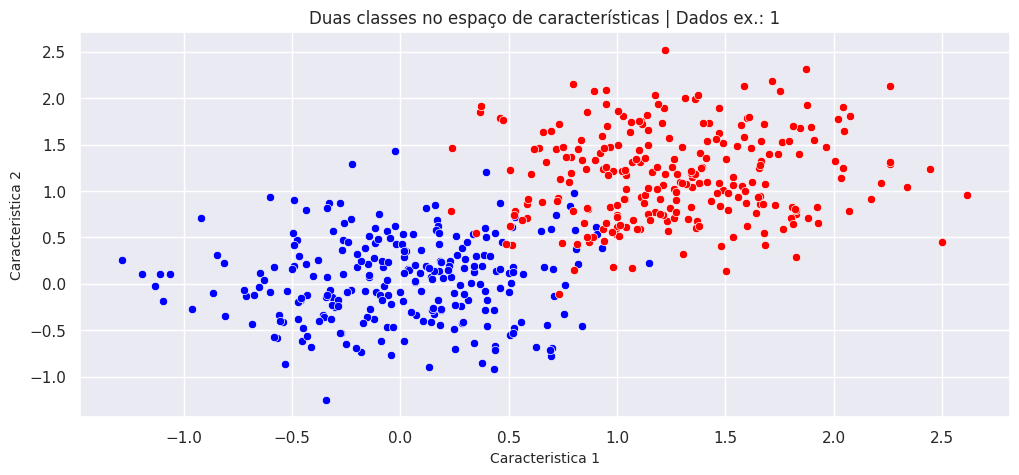

In [37]:
# plot do espaco de caracteristicas
plt.figure(figsize=(12,5))
sns.set_theme()

sns.scatterplot(x=e1_class_1[0], y=e1_class_1[1], color='blue', markers='O')
sns.scatterplot(x=e1_class_2[0], y=e1_class_2[1], color='red', markers='O')

plt.title('Duas classes no espaço de características | Dados ex.: 1', fontsize=12)
plt.xlabel('Caracteristica 1', fontsize=10)
plt.ylabel('Caracteristica 2', fontsize=10)

plt.show()

**a)** Inicie treinando um classificador com máquina de vetores de suporte nestes dados. Para isso, empregue a função “t8_SVM” disponível no github do curso e que se baseia no método SVC da biblioteca Scikit-learn (explore os parâmetros deste método para compreender sua utilização). Utilize os seguintes parâmetros da SVC neste exercício: C=0.1, kernel=*linear*, tol=0.001.

In [38]:
# treinando o classificador
# usamos classes_1[0] para selecionar apenas o array
clf, txerro = t8_SVM(dados_1.T, classes_1[0], C=0.1, kernel='linear', tol=0.001, gamma='scale')

Numero de vetores de suporte classe 0: 53
Numero de vetores de suporte classe 1: 53
Taxa de erro treinamento: 4.0%


**b)** Verifique o número de “support vectors” utilizados na classificação: observe no código que o número de vetores de suporte pode ser acessado diretamente através do atributo *n_support_* da SVC.

In [39]:
# verificando os numeros de svm por meio do atributo
clf.n_support_

array([53, 53], dtype=int32)

**c)** Verifique o número de pontos que foram erroneamente classificados neste treinamento: observe no código que isto pode ser realizado através do método “predict” da SVC.

Este método é chamado no objeto SVM treinado (SVC) e é usado para fazer previsões para o conjunto de dados X. O argumento X é um array-like ou matriz de forma (n_samples, n_features) que representa os dados para os quais você deseja fazer previsões.

In [40]:
# observando as previsões
predict = clf.predict(dados_1.T)
predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
# resultado atual
classes_1

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [42]:
# calculando o número exato de padrões classificados erroneamente
num_erros = np.sum(predict != classes_1[0])
print(f'Número exato de padrões classificados erroneamente: {num_erros}')

Número exato de padrões classificados erroneamente: 20


**d)** Para visualizar o resultado, plote os dados simulados e as linhas do classificador. No caso da SVM linear, como neste exercício, você pode empregar a mesma função da aula 17 para plotar o classificador (“t6_plotaperceptron”). Observe que os pesos do classificador (“w”) podem ser obtidos a partir do objeto da SVM (variável “clf” no output de “t8_SVM”) com o seguinte comando:



```
# w = np.concatenate([clf.coef_[0], clf.intercept_])
```



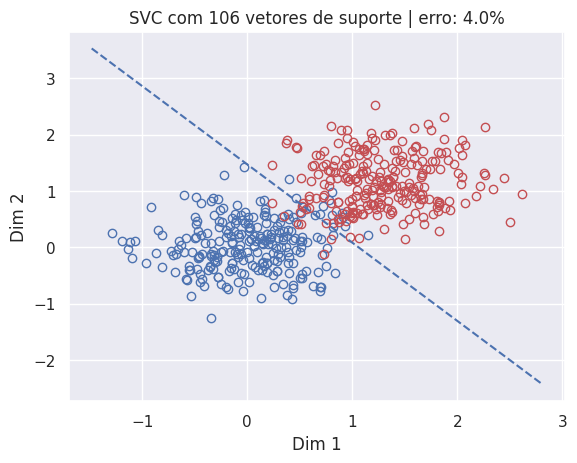

In [43]:
# definicao do peso do classificador
w = np.concatenate([clf.coef_[0], clf.intercept_])

# plot do resultado
t6_plotaperceptron(e1_class_1, e1_class_2, w,
                   f"SVC com {clf.n_support_[0] + clf.n_support_[1]} vetores de suporte | erro: {txerro*100}%",
                   angulo=(-140,40))

Como a SVM também pode ser empregada com um kernel não linear, você também
encontrará outras funções que são específicas para exibir os resultados da SVM e que valem também com outros kernels. Por exemplo, as funções “t8_make_meshgrid” e “t8_plot_contours” disponíveis no material do curso realizam gráficos como neste exemplo aqui. Veja o resultado de se empregar estas funções para este problema na figura abaixo:

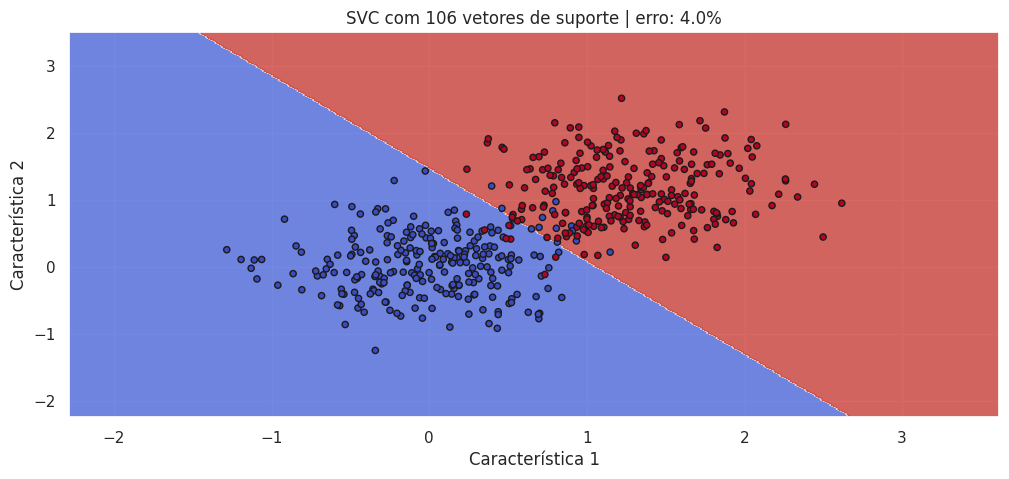

In [57]:
# Cria um meshgrid para visualização das regiões de decisão
xx, yy = t8_makemeshgrid(dados_1[0, :], dados_1[1, :])

# Plota as regiões de decisão do SVM
plt.figure(figsize=(12, 5))
t8_plotcontours(plt, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Plota os pontos das classes
plt.scatter(dados_1[0, :], dados_1[1, :], c=classes_1[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title(f"SVC com {clf.n_support_[0] + clf.n_support_[1]} vetores de suporte | erro: {txerro*100}%")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**e)** Repita o mesmo procedimento para outros valores da constante C. Por exemplo, com C=1

In [60]:
# treinando o classificador
# usamos classes_1[0] para selecionar apenas o array
clf, txerro = t8_SVM(dados_1.T, classes_1[0], C=1, kernel='linear', tol=0.001, gamma='scale')

Numero de vetores de suporte classe 0: 31
Numero de vetores de suporte classe 1: 30
Taxa de erro treinamento: 4.2%


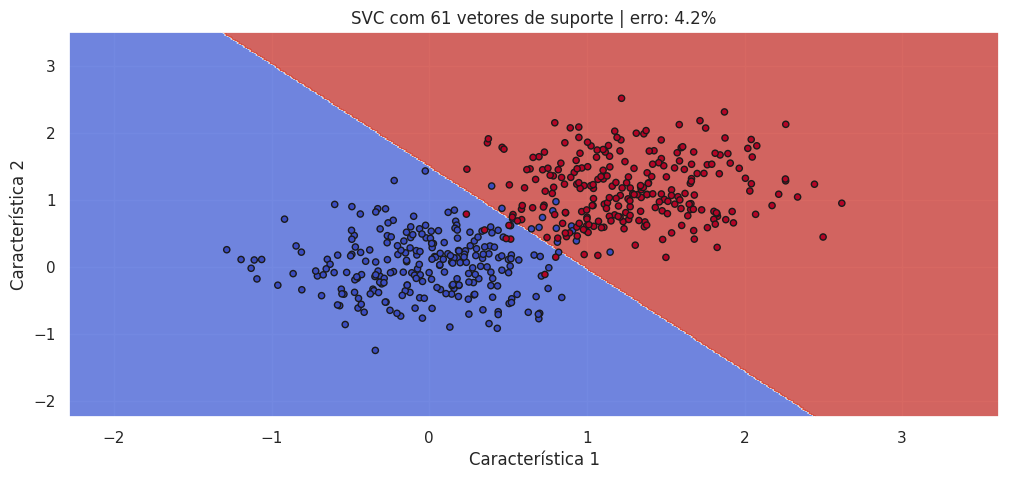

In [61]:
# Cria um meshgrid para visualização das regiões de decisão
xx, yy = t8_makemeshgrid(dados_1[0, :], dados_1[1, :])

# Plota as regiões de decisão do SVM
plt.figure(figsize=(12, 5))
t8_plotcontours(plt, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Plota os pontos das classes
plt.scatter(dados_1[0, :], dados_1[1, :], c=classes_1[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title(f"SVC com {clf.n_support_[0] + clf.n_support_[1]} vetores de suporte | erro: {txerro*100}%")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# SVM Não Linear

Agora vamos explorar um problema de classificação não-linear. Carregue o arquivo “Dados_exercicio2.mat” (ver Classroom). Lá você encontrará 150 padrões (variável “X”), divididos em duas classes (variável “classesX”), em um espaço de duas características.

In [62]:
dados_2 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio2.mat')['X']
classes_2 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio2.mat')['classesX']

**a)** Visualize os dados:

In [63]:
# alterando os dados das classes para tipo binario
classes_2 = np.where(classes_2==-1, 0, classes_2)
classes_2 = np.where(classes_2==1, 1,  classes_2)

In [64]:
# criando um vetor referência unidimensional
mask_2 = classes_2.ravel()

# separando as classes
e2_class_1 = dados_2[:, mask_2==0]
e2_class_2 = dados_2[:, mask_2==1]

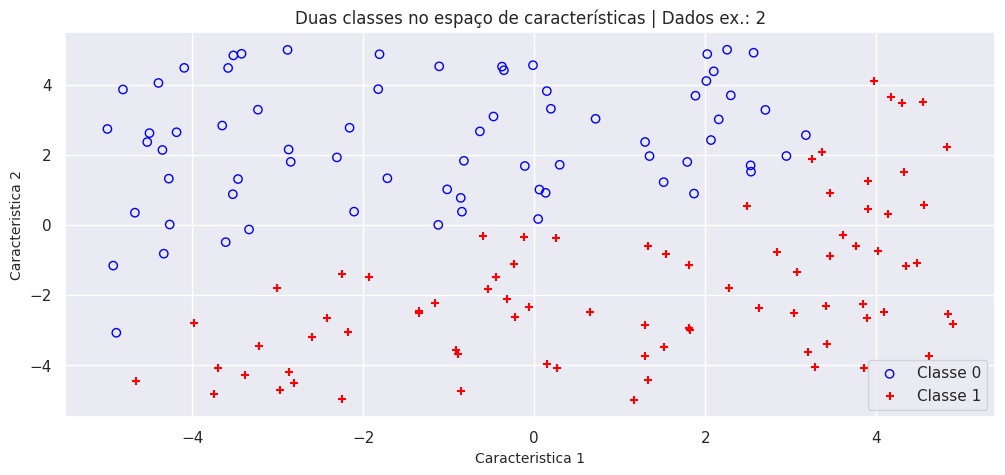

In [68]:
# plot do espaco de caracteristicas usando Matplotlib
plt.figure(figsize=(12, 5))

# plot dos pontos das classes
plt.scatter(e2_class_1[0], e2_class_1[1], color='blue', marker='o', facecolors='none', edgecolors='blue', label='Classe 0')
plt.scatter(e2_class_2[0], e2_class_2[1], color='red', marker='+', label='Classe 1')

plt.title('Duas classes no espaço de características | Dados ex.: 2', fontsize=12)
plt.xlabel('Caracteristica 1', fontsize=10)
plt.ylabel('Caracteristica 2', fontsize=10)
plt.legend()

plt.show()

**b)** Vamos iniciar por uma SVM linear. Repita a análise do exercício 1, mas use agora um parâmetro C=2 na SVM.

In [74]:
# treinando o classificador não-linear
# usamos classes_1[0] para selecionar apenas o array
clf_2, txerro_2 = t8_SVM(dados_2.T, classes_2[0], C=2, kernel='linear', tol=0.001, gamma='scale')

Numero de vetores de suporte classe 0: 13
Numero de vetores de suporte classe 1: 13
Taxa de erro treinamento: 7.333333333333333%


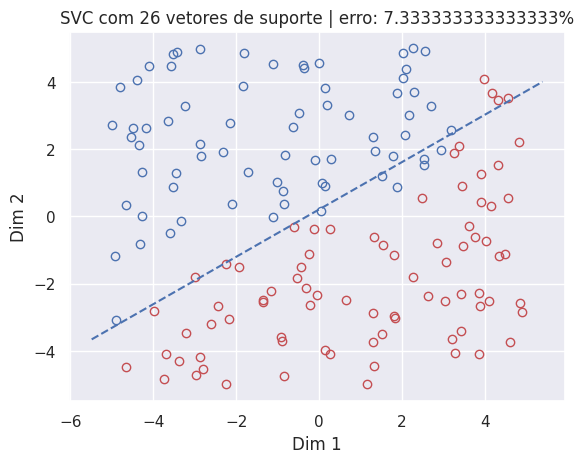

In [75]:
# definicao do peso do classificador
w_2 = np.concatenate([clf_2.coef_[0], clf_2.intercept_])

# plot do resultado
t6_plotaperceptron(e2_class_1, e2_class_2, w_2,
                   f"SVC com {clf_2.n_support_[0] + clf_2.n_support_[1]} vetores de suporte | erro: {txerro_2*100}%",
                   angulo=(-140,40))

**c)** Vamos tentar melhorar nossa SVM escolhendo um Kernel não linear. Podemos tentar com o kernel do tipo RBF (“radial basis function”):

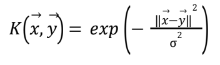

Vamos usar σ = 2. Para rodar uma SVM com este Kernel, basta utilizar o parâmetro kernel = *rbf* e gamma=0.25 nos inputs da função *t8_SVM*.

In [76]:
clf_2, txerro_2 = t8_SVM(dados_2.T, classes_2[0], C=2, kernel='rbf', tol=0.001, gamma=0.25)

Numero de vetores de suporte classe 0: 19
Numero de vetores de suporte classe 1: 21
Taxa de erro treinamento: 0.6666666666666667%


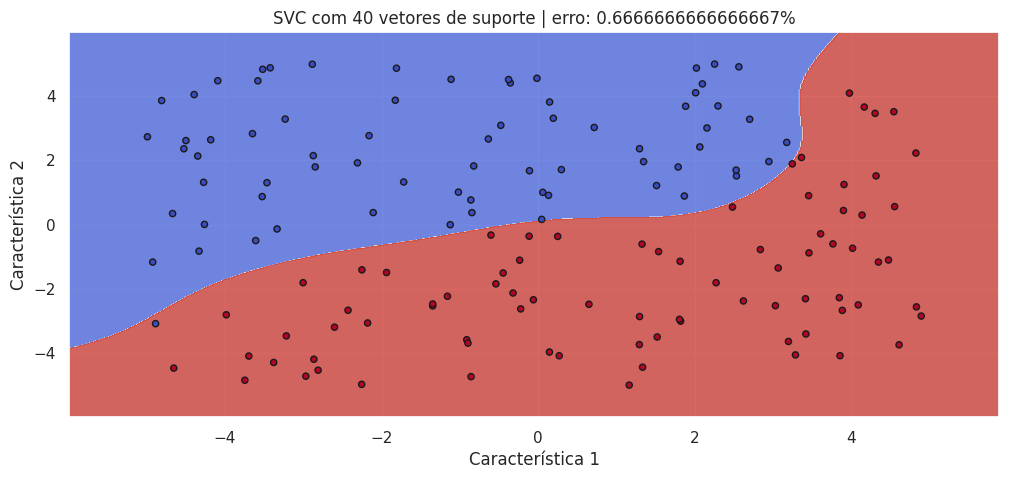

In [83]:
# Cria um meshgrid para visualização das regiões de decisão
xx, yy = t8_makemeshgrid(dados_2[0, :], dados_2[1, :])

# Plota as regiões de decisão do SVM
plt.figure(figsize=(12, 5))
t8_plotcontours(plt, clf_2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Plota os pontos das classes
plt.scatter(dados_2[0, :], dados_2[1, :], c=classes_2[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title(f"SVC com {clf_2.n_support_[0] + clf_2.n_support_[1]} vetores de suporte | erro: {txerro_2*100}%")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**3) [SVM não-linear]:** Neste último teste da SVM, vamos executar uma tarefa de classificaçãoque não poderia ser realizada sem um Kernel não-linear. Carregue o arquivo *Dados_exercicio3.mat* (ver moodle). Plote os dados na variável *X*:

In [84]:
dados_3 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio3.mat')['X']
classes_3 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio3.mat')['classesX']

In [86]:
# alterando os dados das classes para tipo binario
classes_3 = np.where(classes_3==-1, 0, classes_3)
classes_3 = np.where(classes_3==1, 1,  classes_3)

In [87]:
# criando um vetor referência unidimensional
mask_3 = classes_3.ravel()

# separando as classes
e3_class_1 = dados_3[:, mask_3==0]
e3_class_2 = dados_3[:, mask_3==1]

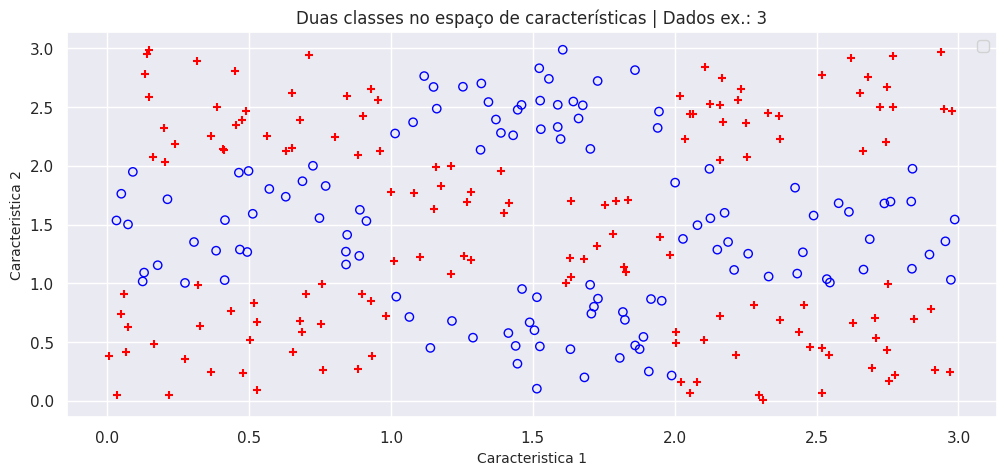

In [89]:
# plot do espaco de caracteristicas usando Matplotlib
plt.figure(figsize=(12, 5))

# plot dos pontos das classes
plt.scatter(e3_class_1[0], e3_class_1[1], color='blue', marker='o', facecolors='none', edgecolors='blue')
plt.scatter(e3_class_2[0], e3_class_2[1], color='red', marker='+')

plt.title('Duas classes no espaço de características | Dados ex.: 3', fontsize=12)
plt.xlabel('Caracteristica 1', fontsize=10)
plt.ylabel('Caracteristica 2', fontsize=10)
plt.legend()

plt.show()

**a)** Repita os passos do exercício anterior e construa a SVM não linear para esse problema. Use, porém gamma=4 e C=2000. Você deverá obter um gráfico mais ou menos assim:

In [90]:
# treinando o classificador não-linear
# usamos classes_1[0] para selecionar apenas o array
clf_3, txerro_3 = t8_SVM(dados_3.T, classes_3[0], C=2000, kernel='rbf', tol=0.001, gamma=4)

Numero de vetores de suporte classe 0: 19
Numero de vetores de suporte classe 1: 20
Taxa de erro treinamento: 0.0%


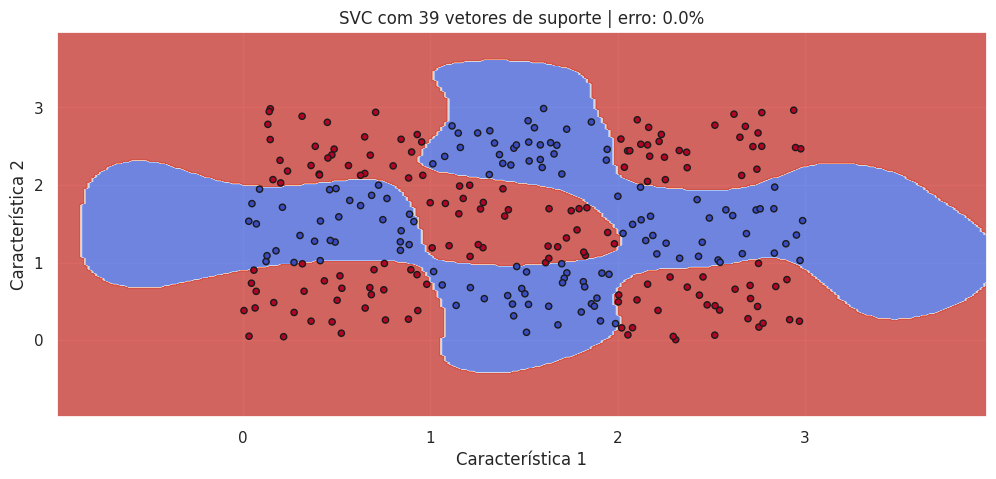

In [91]:
# Cria um meshgrid para visualização das regiões de decisão
xx, yy = t8_makemeshgrid(dados_3[0, :], dados_3[1, :])

# Plota as regiões de decisão do SVM
plt.figure(figsize=(12, 5))
t8_plotcontours(plt, clf_3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# Plota os pontos das classes
plt.scatter(dados_3[0, :], dados_3[1, :], c=classes_3[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')

plt.title(f"SVC com {clf_3.n_support_[0] + clf_3.n_support_[1]} vetores de suporte | erro: {txerro_3*100}%")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**b)** No mesmo arquivo “Dados_exercicio3.mat” você também encontrará uma variável *X2* contendo outros 270 padrões retirados de imagens semelhantes. Use esses padrões para testar o classificador (não para treiná-lo novamente, isto é, classifique os padrões da variável X2 utilizando o classificador obtido com a variável X).

In [99]:
# leitura dos dados X2
dados_x2 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio3.mat')['X2']
classes_x2 = scipy.io.loadmat('/content/drive/MyDrive/ict-unifesp/2023.2/engenharia-medica/atividade-pratica-8/Dados_exercicio3.mat')['classesX2']

In [104]:
# alterando os dados das classes para tipo binario
classes_x2 = np.where(classes_x2==-1, 0, classes_x2)
classes_x2 = np.where(classes_x2==1, 1,  classes_x2)

In [105]:
# classificar os padrões da variável X2 usando o classificador treinado
predictions_x2 = clf_3.predict(dados_x2.T)

# Calcular a taxa de erro do teste
erro_teste = np.sum(predictions_x2 != classes_x2) / len(classes_x2)

<ipython-input-109-2b22040c5e43>:9: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(dados_x2[0, :], dados_x2[1, :], c=predictions_x2, cmap=plt.cm.coolwarm, s=20, edgecolors='k', marker='x', label='Teste')


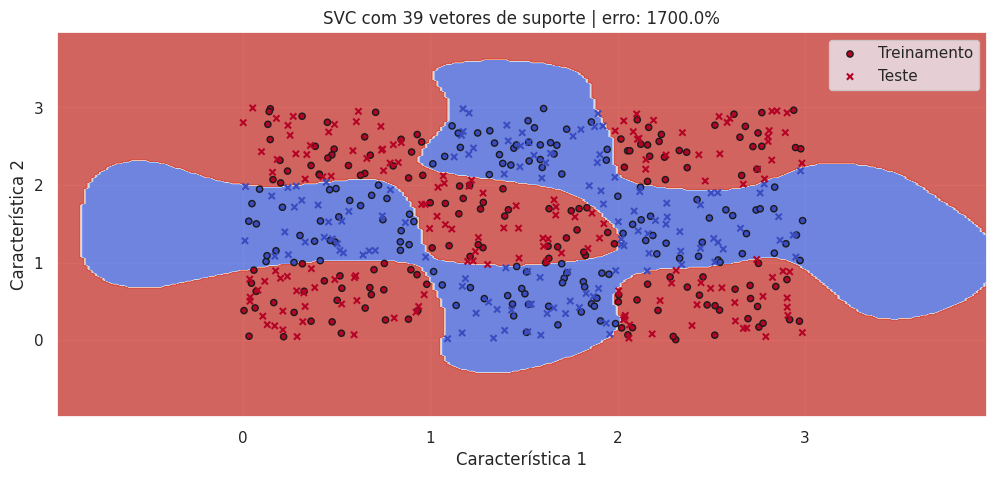

In [109]:
# Visualizar os resultados da classificação
plt.figure(figsize=(12, 5))
t8_plotcontours(plt, clf_3, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# plota os pontos das classes para os padrões da variável X
plt.scatter(dados_3[0, :], dados_3[1, :], c=classes_3[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Treinamento')

# plota os pontos das classes para os padrões da variável X2 com marcadores diferentes
plt.scatter(dados_x2[0, :], dados_x2[1, :], c=predictions_x2, cmap=plt.cm.coolwarm, s=20, edgecolors='k', marker='x', label='Teste')

plt.title(f"SVC com {clf_3.n_support_[0] + clf_3.n_support_[1]} vetores de suporte | erro: {erro_teste*100}%")
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.show()